# Predicting 2016 Iowa Liquor Sales

Problem Statement, Goals Of Study and Criteria for Success:

With a statewide deficit of \$130 million in 2017 from a surplus of \$927 million in 2013 it is vital for us to find new streams of revenue. The purpose of this study is to find how much Iowans are spending on liquor in each store and in order for the Iowa State Tax Board to come to a conlucsion about changing the states current liqour tax higher, lower, or equal to its current 50% mark up. If we were to increase the tax on liquor it could help fund the fight against illegal drug use with treatment centers to improve Iowa’s already impressive rate of recovery from 1,500 meth labs in 2004 to 135 in 2015 and combat the rising opioid crises with Prescription and Heroin recreational use at an all time high. It could also give the state some much needed funding for infrastructure and agricultural reform as well as provide better funding for Iowa’s big moment on the national stage every four years, the Iowa Caucuses. Currently, the rate of liquor consumption by total gallons sold to adults has increased by about 2 million since 2004. Our goal is to find out if the current trend of liquor use in the state will continue in the future based on the sales of the last year and half and what type of revenue that it will raise for the state.


####  Loading Packages and Importing Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import scipy.stats as stats

/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
data = pd.read_csv("/Users/ThomasPLapinger/Documents/GA/Project2/Iowa Liquor Stats/Iowa_Liquor_Sales_reduced.csv") #Loading Data into system using pd.read_csv
data


/Users/ThomasPLapinger/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.50,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.00,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.50,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.60,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.50,1.19
5,03/31/2016,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,$23.00,$34.50,1,$34.50,0.75,0.20
6,03/31/2016,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69636,Dr. Mcgillicuddy's Cherry Schnapps,750,$8.67,$13.01,4,$52.04,3.00,0.79
7,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88294,Patron Silver Tequila,375,$14.00,$21.00,12,$252.00,4.50,1.19
8,03/31/2016,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,259,52318,Christian Bros Brandy,1750,$11.83,$17.75,6,$106.50,10.50,2.77
9,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,389,49185,Remy Martin Vsop (flask),375,$10.66,$15.99,12,$191.88,4.50,1.19


## Exploratory Data Analysis

Generating Address Feature, Datetime Conversion, and Removing Dollar Signs

In [3]:
data['Zip Code']=data['Zip Code'].astype(str)

In [4]:
data['Address'] = data.City + ", " + data.County + " " + data["Zip Code"] #Merging City, County and Zip code into Category Address

In [5]:
data["Date"] = pd.to_datetime(data["Date"], format='%m/%d/%Y') #Change dates format

In [6]:
#Convert all Dollar Columns to Floats and Remove $ sign.
data['State Bottle Cost'] = data['State Bottle Cost'].map(lambda x: str(x)[1:]).astype(float)
data['State Bottle Retail'] = data['State Bottle Retail'].map(lambda x: str(x)[1:]).astype(float)
data['Sale (Dollars)'] = data['Sale (Dollars)'].map(lambda x: str(x)[1:]).astype(float)

In [7]:
#Ritikas Bashkir EDA function
def eda(dataframe):
    print "Missing Values \n \n", dataframe.isnull().sum(),"\n" #find missing values
    print "Duplicate Rows \n", dataframe.duplicated().sum(),"\n" #find duplicated values
    print "Dataframe Types \n \n", dataframe.dtypes,"\n" #datatypes of each column
    print "Dataframe Shape \n", dataframe.shape,"\n" #number of rows and columns
    print "Dataframe Describe \n \n", dataframe.describe(include='all'),"\n" #Describe all columns
    for feature in dataframe: # Prints unique values for each column 
        print feature
        print dataframe[feature].nunique()

In [8]:
data[data.duplicated()] #Reveal Duplicates
data.drop_duplicates(inplace = True) #Remove Duplicates

In [9]:
data["Category Name"].value_counts() #List of Count of Alcohol types sold

VODKA 80 PROOF                        353011
CANADIAN WHISKIES                     269582
STRAIGHT BOURBON WHISKIES             153625
SPICED RUM                            145540
VODKA FLAVORED                        141865
TEQUILA                               121750
BLENDED WHISKIES                      115953
WHISKEY LIQUEUR                       109593
IMPORTED VODKA                        107992
PUERTO RICO & VIRGIN ISLANDS RUM       99647
FLAVORED RUM                           72607
TENNESSEE WHISKIES                     72076
AMERICAN COCKTAILS                     68187
AMERICAN DRY GINS                      65529
AMERICAN GRAPE BRANDIES                64735
IMPORTED VODKA - MISC                  64631
MISC. IMPORTED CORDIALS & LIQUEURS     63405
CREAM LIQUEURS                         62526
SCOTCH WHISKIES                        52267
IMPORTED GRAPE BRANDIES                46503
IMPORTED SCHNAPPS                      43042
MISC. AMERICAN CORDIALS & LIQUEURS     33736
100 PROOF 

In [10]:
data[data["State Bottle Cost"] < 1.00] #Checking what bottles have a low State Bottle cost of less than $1.00. Unsuprisingly it is very cheap liquor.

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Address
176,2016-03-31,5165,LAKE MILLS,50450,95.0,Winnebago,1081600.0,WHISKEY LIQUEUR,421,64870,Fireball Cinnamon,100,0.89,1.34,48,64.32,4.8,1.27,"LAKE MILLS, Winnebago 50450"
402,2016-03-31,5196,CORALVILLE,52241,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,421,64870,Fireball Cinnamon,100,0.89,1.34,48,64.32,4.8,1.27,"CORALVILLE, Johnson 52241"
674,2016-03-31,5101,WATERLOO,50701,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370,32232,Seagrams Extra Dry Gin,100,0.97,1.46,48,70.08,4.8,1.27,"WATERLOO, Black Hawk 50701"
685,2016-03-31,5174,WATERLOO,50701,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370,32232,Seagrams Extra Dry Gin,100,0.97,1.46,48,70.08,4.8,1.27,"WATERLOO, Black Hawk 50701"
889,2016-03-31,3993,WATERLOO,50701,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370,32232,Seagrams Extra Dry Gin,100,0.97,1.46,48,70.08,4.8,1.27,"WATERLOO, Black Hawk 50701"
932,2016-03-31,5063,WATERLOO,50703,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,370,32232,Seagrams Extra Dry Gin,100,0.97,1.46,144,210.24,14.4,3.80,"WATERLOO, Black Hawk 50703"
1516,2016-03-31,4104,MASON CITY,50401,17.0,Cerro Gordo,1081600.0,WHISKEY LIQUEUR,421,64870,Fireball Cinnamon,100,0.89,1.34,240,321.60,24.0,6.34,"MASON CITY, Cerro Gordo 50401"
2026,2016-03-31,4638,DAVENPORT,52804,82.0,Scott,1081380.0,MISCELLANEOUS SCHNAPPS,55,84171,99 Bananas,100,0.89,1.34,48,64.32,4.8,1.27,"DAVENPORT, Scott 52804"
2164,2016-03-31,2587,JOHNSTON,50131,77.0,Polk,1031080.0,VODKA 80 PROOF,421,38089,Platinum 7x Vodka,100,0.89,1.34,48,64.32,4.8,1.27,"JOHNSTON, Polk 50131"
2508,2016-03-31,4638,DAVENPORT,52804,82.0,Scott,1081600.0,WHISKEY LIQUEUR,421,64870,Fireball Cinnamon,100,0.89,1.34,96,128.64,9.6,2.54,"DAVENPORT, Scott 52804"


In [11]:
data[data.isnull().any(axis = 1)] #shows columns with with missing Data

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Address
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.50,1.19,NaN
114,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1011300.0,TENNESSEE WHISKIES,85,86670,Jack Daniel's Tennessee Honey,750,15.07,22.61,3,67.83,2.25,0.59,NaN
209,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081400.0,TRIPLE SEC,65,82606,Dekuyper Sour Apple Pucker,750,6.30,9.45,3,28.35,2.25,0.59,NaN
271,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,260,68034,Bailey's Original Irish Cream,375,7.00,10.50,3,31.50,1.12,0.30,NaN
288,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64864,Fireball Cinnamon Whisky,375,5.33,8.00,6,48.00,2.25,0.59,NaN
290,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081300.0,PEPPERMINT SCHNAPPS,434,81196,Paramount Peppermint Schnapps Traveler,750,3.75,5.63,3,16.89,2.25,0.59,NaN
296,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1022100.0,TEQUILA,395,87408,Jose Cuervo Especial Silver,750,10.49,15.74,6,94.44,4.50,1.19,NaN
323,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1062310.0,SPICED RUM,240,45886,Sailor Jerry Spiced Navy Rum,750,9.65,14.48,3,43.44,2.25,0.59,NaN
376,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,259,52316,Christian Bros Brandy,750,5.92,8.88,3,26.64,2.25,0.59,NaN
379,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434,45275,Paramount White Rum Traveler,750,4.00,6.00,6,36.00,4.50,1.19,NaN


In [12]:
print data[data.isnull().any(axis = 1)]["Sale (Dollars)"].sum() #Sum of Sale (Dollars) for columns missing data
print data["Sale (Dollars)"].sum() #Sum of Sale (Dollars)
print 2304524.62/349393306.369 #figuring out percentage of sales in missing columns to the whole dataset

2304524.62
349393306.369
0.00659578926668


In [13]:
data.dropna(axis=0, how ='all') #removing rows that are all NaN 

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Address
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.50,1.19,"DAVENPORT, Scott 52806"
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.00,0.53,"DAVENPORT, Scott 52806"
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.50,2.77,"CEDAR FALLS, Black Hawk 50613"
3,2016-03-31,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,2.24,3.36,48,161.28,9.60,2.54,"DES MOINES, Polk 50314"
4,2016-03-31,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,12.50,18.75,6,112.50,4.50,1.19,NaN
5,2016-03-31,4988,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,260,17090,Bulleit Bourbon 10YR,750,23.00,34.50,1,34.50,0.75,0.20,"CEDAR FALLS, Black Hawk 50613"
6,2016-03-31,3993,WATERLOO,50701,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,421,69636,Dr. Mcgillicuddy's Cherry Schnapps,750,8.67,13.01,4,52.04,3.00,0.79,"WATERLOO, Black Hawk 50701"
7,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,410,88294,Patron Silver Tequila,375,14.00,21.00,12,252.00,4.50,1.19,"DAVENPORT, Scott 52806"
8,2016-03-31,5144,ANKENY,50021,77.0,Polk,1051010.0,AMERICAN GRAPE BRANDIES,259,52318,Christian Bros Brandy,1750,11.83,17.75,6,106.50,10.50,2.77,"ANKENY, Polk 50021"
9,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1052010.0,IMPORTED GRAPE BRANDIES,389,49185,Remy Martin Vsop (flask),375,10.66,15.99,12,191.88,4.50,1.19,"DAVENPORT, Scott 52806"


### Visualizations

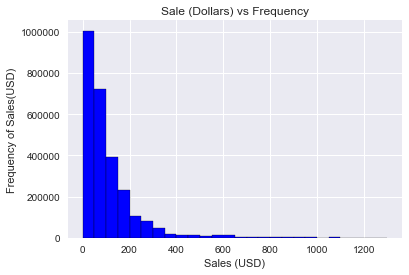

In [14]:
bins2 = [0,50,100,150,200,250,300,350,400,450,500,550,650,700,750,800,850,900,950,1000,1050,1100,1150,1200,1250,1300]
plt.hist(data["Sale (Dollars)"],bins=bins2, ec='black',color='blue')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 100
plt.xlabel('Sales (USD)')
plt.ylabel('Frequency of Sales(USD)')
plt.title("Sale (Dollars) vs Frequency")
plt.show()

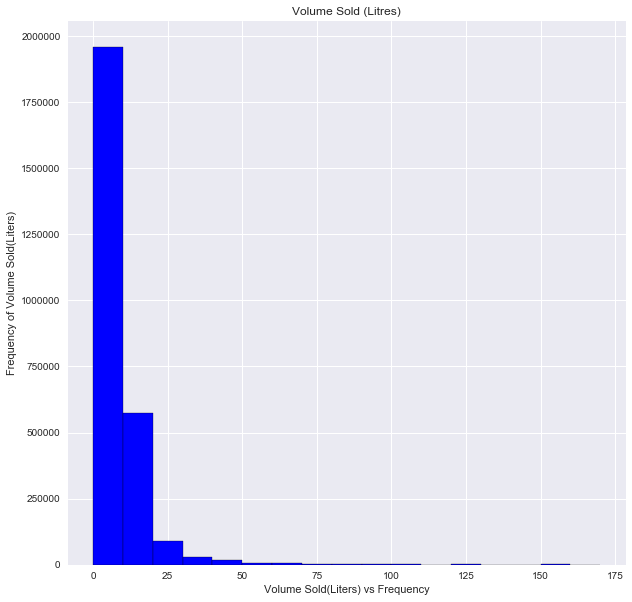

In [15]:
bins3 = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170]
plt.hist(data["Volume Sold (Liters)"],bins=bins3, ec='black',color='blue')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 100
plt.xlabel('Volume Sold(Liters) vs Frequency')
plt.ylabel('Frequency of Volume Sold(Liters)')
plt.title("Volume Sold (Litres)")
plt.show()

### Initial Findings

Interpretations of Exploratory Analysis

In the Data we can see that there are a total of 39,600 points, or 1.5% of the Data, of missing data  amounts to 2,304,524.62  in sales. While that is a small amount of of sales compared to the 349,393,306.369 in total sales it could still affect the models later and is why it remains in the dataset.. It is also important to note that no row is missing data from a columns needed for numerical calculations. They are all from  County, County Number, Category Name, and Address. 

The Eda function also shows us that of the 386 cities in the data set the most frequent liquor sales occur in Des Moines. It accounts for a total of 8.8% of the sales locations. While Polk County accounts for 18.2% of the sales. This all makes sense considering Des Moines is the largest city and polk is the most populous County in the state and includes University of Iowa. However Ames, Story 50010 is the most frequent address account for 2.62% of the sales. It is also not surprising with Ames being another populous area and the 50010 zip code overlaps with the Iowa State University.

We can Also see that Vodka 80 Proof is the most popular drink accounting for 13.07% of Purchases with the next two most popular choices being Canadian Whiskies and Straight Bourbon Whiskies each account for 10.02% and 5.68% respectively. Meaning the top three liquors account for 28.77% of all types of liquor sold.

A risk going forward is that I chose to include rows with missing Data because they didn't have missing date on sales, but if we were trying to figure out where the most sales occurred and where another liquor store should go this may cause a problem. Another assumption we are making is that the time period we are looking at Q1 2015 through Q1 2016 is a normal year and that is a good example of the overall trend of Iowa's consumption levels. We have no way of knowing if events like more or less snowfall affect the sales, whether the Campaigning  during the build up to the Iowa Caucuses on February 1 affected sales or other events changed sales levels.

## Mining the Data

In [16]:
#Generating Data for Sales for Each Quarter grouped by Store Number #Print Sum of Each Quarter and Total 
Sales_2015Q1 = data[(data.Date >= "2015-01-01") & (data.Date <"2015-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()
Sales_2015Q2 = data[(data.Date >= "2015-04-01") & (data.Date <"2015-07-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()
Sales_2015Q3 = data[(data.Date >= "2015-07-01") & (data.Date <"2015-10-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()
Sales_2015Q4 = data[(data.Date >= "2015-10-01") & (data.Date < "2016-01-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()
Sales_2016Q1 = data[(data.Date >= "2016-01-01") & (data.Date <"2016-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()
print "Sales 2015 1st Quarter: $", Sales_2015Q1.sum(), "\nSales 2015 2nd Quarter: $", Sales_2015Q2.sum(), "\nSales 2015 3rd Quarter: $", Sales_2015Q3.sum(), "\nSales 2015 4th Quarter: $", Sales_2015Q4.sum(), "\nSales 2016 1st Quarter: $", Sales_2016Q1.sum()
print "Total Sales 2015 : $", Sales_2015Q1.sum() + Sales_2015Q2.sum()+Sales_2015Q3.sum()+Sales_2015Q4.sum()

Sales 2015 1st Quarter: $ 62922522.31 
Sales 2015 2nd Quarter: $ 72292923.6 
Sales 2015 3rd Quarter: $ 68511211.73 
Sales 2015 4th Quarter: $ 80217932.4 
Sales 2016 1st Quarter: $ 65448716.33
Total Sales 2015 : $ 283944590.04


In [17]:
print "Percent Sales increase 2016 Q1 from 2015 Q1:", Sales_2016Q1.sum()/Sales_2015Q1.sum()," Which is a rise of $", Sales_2016Q1.sum()-Sales_2015Q1.sum()
print "\nSales Forcast Increase for 2016 Q2:", Sales_2015Q2.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()), " Which is a rise of $", (Sales_2015Q2.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))-Sales_2015Q2.sum()
print "\nSales Forcast Increase for 2016 Q3:", Sales_2015Q3.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()), " Which is a rise of $", (Sales_2015Q3.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))-Sales_2015Q3.sum()
print "\nSales Forcast Increase for 2016 Q4:", Sales_2015Q4.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()), " Which is a rise of $", (Sales_2015Q4.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))-Sales_2015Q4.sum()


Percent Sales increase 2016 Q1 from 2015 Q1: 1.04014769159  Which is a rise of $ 2526194.02

Sales Forcast Increase for 2016 Q2: 75195317.6011  Which is a rise of $ 2902394.0011

Sales Forcast Increase for 2016 Q3: 71261778.7292  Which is a rise of $ 2750566.99925

Sales Forcast Increase for 2016 Q4: 83438497.2103  Which is a rise of $ 3220564.81028


In [18]:
#Total Sales Forecast for 2016
Predicted_2016_Salesincrease = Sales_2016Q1.sum()+(Sales_2015Q2.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum())) + (Sales_2015Q3.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))+(Sales_2015Q4.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))
print "Predicted 2016 Sales increase: $", Predicted_2016_Salesincrease
#2016 Sales compared to 2015
Total_2015_Sales = Sales_2015Q1.sum() + Sales_2015Q2.sum()+Sales_2015Q3.sum()+Sales_2015Q4.sum()
print "Predicted Total 2015/16: $" , Predicted_2016_Salesincrease + Total_2015_Sales

Predicted 2016 Sales increase: $ 295344309.871
Predicted Total 2015/16: $ 579288899.911


In [19]:
PredictedSales_2016=(Sales_2016Q1.sum()+(Sales_2015Q2.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum())) + (Sales_2015Q3.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum()))+(Sales_2015Q4.sum()*(Sales_2016Q1.sum()/Sales_2015Q1.sum())))+(Sales_2015Q1.sum() + Sales_2015Q2.sum()+Sales_2015Q3.sum()+Sales_2015Q4.sum())
PredictedSales_2016

579288899.9106277

In [20]:
#Turning sales data into dataframe
Sales_2015Q1 = pd.DataFrame({"Sales 2015 Q1":data[(data.Date >= "2015-01-01") & (data.Date <"2015-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q2 = pd.DataFrame({"Sales 2015 Q2":data[(data.Date >= "2015-04-01") & (data.Date <"2015-07-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q3 = pd.DataFrame({"Sales 2015 Q3":data[(data.Date >= "2015-07-01") & (data.Date <"2015-10-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2015Q4 = pd.DataFrame({"Sales 2015 Q4":data[(data.Date >= "2015-10-01") & (data.Date < "2016-01-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales_2016Q1 = pd.DataFrame({"Sales 2016 Q1":data[(data.Date >= "2016-01-01") & (data.Date <"2016-04-01")].groupby(['Store Number'])['Sale (Dollars)'].sum()})
Sales2015_to_2016 = pd.concat([Sales_2015Q1,Sales_2015Q2,Sales_2015Q3, Sales_2015Q4,Sales_2016Q1], axis=1, join="outer")
Sales2015_to_2016["Total 2015 Sales"] = Sales2015_to_2016["Sales 2015 Q1"] + Sales2015_to_2016["Sales 2015 Q2"] + Sales2015_to_2016["Sales 2015 Q3"] + Sales2015_to_2016["Sales 2015 Q4"]
Sales2015_to_2016["Sales 2016 Q2"] = Sales2015_to_2016["Sales 2015 Q2"] * 1.04014769159  
Sales2015_to_2016["Sales 2016 Q3"] = Sales2015_to_2016["Sales 2015 Q3"] * 1.04014769159  
Sales2015_to_2016["Sales 2016 Q4"] = Sales2015_to_2016["Sales 2015 Q4"] * 1.04014769159  
Sales2015_to_2016["Total 2016 Sales"] = Sales2015_to_2016["Sales 2016 Q1"] + Sales2015_to_2016["Sales 2016 Q2"] + Sales2015_to_2016["Sales 2016 Q3"] + Sales2015_to_2016["Sales 2016 Q4"]
Sales2015_to_2016

,Sales 2015 Q1,Sales 2015 Q2,Sales 2015 Q3,Sales 2015 Q4,Sales 2016 Q1,Total 2015 Sales,Sales 2016 Q2,Sales 2016 Q3,Sales 2016 Q4,Total 2016 Sales
Store Number,,,,,,,,,,
2106,337166.53,372684.20,336013.45,388505.67,337804.05,1434369.85,387646.610322,349503.614361,404103.275820,1.479058e+06
2113,22351.86,23468.56,18796.97,21146.03,21736.63,85763.42,24410.768509,19551.624954,21994.994291,8.769402e+04
2130,277764.46,277445.42,249453.87,303332.24,306534.03,1107995.99,288584.213155,259468.867039,315510.329221,1.170097e+06
2152,16805.11,18259.91,21014.29,15963.55,13677.26,72042.86,18993.003235,21857.965234,16604.449682,7.113268e+04
2178,54411.42,77838.96,66176.02,79325.88,58701.31,277752.28,80964.014560,68832.834442,82510.630965,2.910088e+05
2190,254982.43,322075.68,285240.72,360451.53,331852.01,1222750.36,335006.275069,296692.476455,374922.826860,1.338474e+06
2191,318758.97,317185.33,319992.61,318603.97,302325.82,1274540.88,329919.588806,332839.574617,331395.183927,1.296480e+06
2200,45340.33,62546.60,54577.86,61450.20,55315.23,223914.99,65057.701607,56769.035091,63917.283678,2.410593e+05
2205,57849.23,54957.49,58089.61,60755.54,NaN,231651.87,57163.906359,60421.773747,63194.734682,NaN


In [21]:
#Replace NaN Columns with Zero so model will not skip lines containing NaN
Sales2015_to_2016.isnull().sum()
Sales2015_to_20161= Sales2015_to_2016.dropna()
#NaNs could indicate that the store was either went out of business, had not opened yet, or only open for a limited time.

In [22]:
#Groupby County DataFrame
CountySales_2015Q1 = pd.DataFrame({"Sales 2015 Q1":data[(data.Date >= "2015-01-01") & (data.Date <"2015-04-01")].groupby(['County'])['Sale (Dollars)'].sum()})
CountySales_2015Q2 = pd.DataFrame({"Sales 2015 Q2":data[(data.Date >= "2015-04-01") & (data.Date <"2015-07-01")].groupby(['County'])['Sale (Dollars)'].sum()})
CountySales_2015Q3 = pd.DataFrame({"Sales 2015 Q3":data[(data.Date >= "2015-07-01") & (data.Date <"2015-10-01")].groupby(['County'])['Sale (Dollars)'].sum()})
CountySales_2015Q4 = pd.DataFrame({"Sales 2015 Q4":data[(data.Date >= "2015-10-01") & (data.Date < "2016-01-01")].groupby(['County'])['Sale (Dollars)'].sum()})
CountySales_2016Q1 = pd.DataFrame({"Sales 2016 Q1":data[(data.Date >= "2016-01-01") & (data.Date <"2016-04-01")].groupby(['County'])['Sale (Dollars)'].sum()})
CountySales2015_to_2016 = pd.concat([CountySales_2015Q1,CountySales_2015Q2,CountySales_2015Q3, CountySales_2015Q4,CountySales_2016Q1], axis=1, join="outer")
CountySales2015_to_2016["Predicted Sales 2016 Q2"] = CountySales2015_to_2016["Sales 2015 Q2"] * (CountySales2015_to_2016["Sales 2016 Q1"].sum()/CountySales2015_to_2016["Sales 2015 Q1"].sum())
CountySales2015_to_2016["Predicted Sales 2016 Q3"] = CountySales2015_to_2016["Sales 2015 Q3"] * (CountySales2015_to_2016["Sales 2016 Q1"].sum()/CountySales2015_to_2016["Sales 2015 Q1"].sum())
CountySales2015_to_2016["Predicted Sales 2016 Q4"] = CountySales2015_to_2016["Sales 2015 Q4"] * (CountySales2015_to_2016["Sales 2016 Q1"].sum()/CountySales2015_to_2016["Sales 2015 Q1"].sum()) 
CountySales2015_to_2016

,Sales 2015 Q1,Sales 2015 Q2,Sales 2015 Q3,Sales 2015 Q4,Sales 2016 Q1,Predicted Sales 2016 Q2,Predicted Sales 2016 Q3,Predicted Sales 2016 Q4
County,,,,,,,,
Adair,1.035563e+05,1.011265e+05,9.786139e+04,1.194770e+05,1.054293e+05,1.034009e+05,1.000624e+05,1.221642e+05
Adams,2.033503e+04,2.408416e+04,2.495783e+04,3.121978e+04,2.183449e+04,2.462584e+04,2.551916e+04,3.192195e+04
Allamakee,1.559890e+05,2.375674e+05,2.127924e+05,2.169949e+05,1.798787e+05,2.429105e+05,2.175784e+05,2.218753e+05
Appanoose,1.517555e+05,2.259560e+05,2.234256e+05,2.321339e+05,1.768843e+05,2.310381e+05,2.284507e+05,2.373549e+05
Audubon,3.927446e+04,4.230165e+04,4.148062e+04,5.079250e+04,3.711357e+04,4.325307e+04,4.241357e+04,5.193489e+04
Benton,1.854067e+05,1.690040e+05,1.668150e+05,2.038100e+05,1.787008e+05,1.728051e+05,1.705669e+05,2.083939e+05
Black Hawk,3.592810e+06,4.168131e+06,3.684177e+06,4.585534e+06,3.819453e+06,4.261877e+06,3.767039e+06,4.688668e+06
Boone,3.701714e+05,4.442194e+05,4.316969e+05,4.997943e+05,4.145943e+05,4.542105e+05,4.414063e+05,5.110353e+05
Bremer,4.052962e+05,4.993047e+05,4.015752e+05,4.856280e+05,3.749000e+05,5.105347e+05,4.106071e+05,4.965503e+05


In [23]:
CountySales2015_to_2016.fillna(value='0.00')

,Sales 2015 Q1,Sales 2015 Q2,Sales 2015 Q3,Sales 2015 Q4,Sales 2016 Q1,Predicted Sales 2016 Q2,Predicted Sales 2016 Q3,Predicted Sales 2016 Q4
County,,,,,,,,
Adair,1.035563e+05,1.011265e+05,9.786139e+04,1.194770e+05,1.054293e+05,1.034009e+05,1.000624e+05,1.221642e+05
Adams,2.033503e+04,2.408416e+04,2.495783e+04,3.121978e+04,2.183449e+04,2.462584e+04,2.551916e+04,3.192195e+04
Allamakee,1.559890e+05,2.375674e+05,2.127924e+05,2.169949e+05,1.798787e+05,2.429105e+05,2.175784e+05,2.218753e+05
Appanoose,1.517555e+05,2.259560e+05,2.234256e+05,2.321339e+05,1.768843e+05,2.310381e+05,2.284507e+05,2.373549e+05
Audubon,3.927446e+04,4.230165e+04,4.148062e+04,5.079250e+04,3.711357e+04,4.325307e+04,4.241357e+04,5.193489e+04
Benton,1.854067e+05,1.690040e+05,1.668150e+05,2.038100e+05,1.787008e+05,1.728051e+05,1.705669e+05,2.083939e+05
Black Hawk,3.592810e+06,4.168131e+06,3.684177e+06,4.585534e+06,3.819453e+06,4.261877e+06,3.767039e+06,4.688668e+06
Boone,3.701714e+05,4.442194e+05,4.316969e+05,4.997943e+05,4.145943e+05,4.542105e+05,4.414063e+05,5.110353e+05
Bremer,4.052962e+05,4.993047e+05,4.015752e+05,4.856280e+05,3.749000e+05,5.105347e+05,4.106071e+05,4.965503e+05


## Refine the Data

In [24]:
#Searching For Best Predictor
def beta_predictors(x, y):
    pearson = scipy.stats.pearsonr(x,y)[0]
    print "Pearson Correlation is", pearson
    y_stddev= np.std(y, ddof = 1)
    x_stddev= np.std(x, ddof = 1)
    xy_stddev=y_stddev/x_stddev
    Beta_1=pearson*xy_stddev
            #slope=sample Pearson's correlation of all xi and yi * ((standard deviation of Y)/(standard deviation of x))
    Beta_0 = np.mean(y) - (Beta_1*np.mean(x)) 
            #y-intercept=mean of y -(slope*(mean of x))
    return "Estimate for Y-Intercept(Beta0) is "+ str(Beta_0) + " and the estimate for the Slope(Beta1) is " + str(Beta_1) + "."

In [25]:
mean = data["State Bottle Retail"].mean()
std_SBR = data["State Bottle Retail"].std()
SOE = std_SBR/(len(data)**0.5)
CI_95 = stats.norm.interval(0.95, loc = mean, scale = SOE)
print "95% Confidence Interval is CI:", CI_95 
beta_predictors(data["State Bottle Retail"],data["Sale (Dollars)"])

95% Confidence Interval is CI: (14.712590569025821, 14.765889732377886)
Pearson Correlation is 0.106221048331


'Estimate for Y-Intercept(Beta0) is 101.124753938 and the estimate for the Slope(Beta1) is 1.89741037967.'

In [26]:
mean = data["Bottles Sold"].mean()
std_BS = data["Bottles Sold"].std()
SOE = std_BS/(len(data)**0.5)
CI_95 = stats.norm.interval(0.95, loc = mean, scale = SOE)
print "95% Confidence Interval is CI:", CI_95 
beta_predictors(data["Bottles Sold"],data["Sale (Dollars)"])

95% Confidence Interval is CI: (9.8088879375248332, 9.8648939031343339)
Pearson Correlation is 0.836076344242


'Estimate for Y-Intercept(Beta0) is -10.7196143286 and the estimate for the Slope(Beta1) is 14.2129008698.'

In [27]:
mean = data["Volume Sold (Liters)"].mean()
std_VSl = data["Volume Sold (Liters)"].std()
SOE = std_VSl/(len(data)**0.5)
CI_95 = stats.norm.interval(0.95, loc = mean, scale = SOE)
print "95% Confidence Interval is CI:", CI_95 
beta_predictors(data["Volume Sold (Liters)"],data["Sale (Dollars)"])

95% Confidence Interval is CI: (8.8861724327323852, 8.9534801081577715)
Pearson Correlation is 0.840181677081


'Estimate for Y-Intercept(Beta0) is 23.0837636882 and the estimate for the Slope(Beta1) is 11.8844666125.'

In [28]:
mean = data["State Bottle Cost"].mean()
std_SBC = data["State Bottle Cost"].std()
SOE = std_SBC/(len(data)**0.5)
CI_95 = stats.norm.interval(0.95, loc = mean, scale = SOE)
print "95% Confidence Interval is CI:", CI_95 
beta_predictors(data["State Bottle Cost"],data["Sale (Dollars)"])

95% Confidence Interval is CI: (9.7978574457168079, 9.8333907018249427)
Pearson Correlation is 0.106153766179


'Estimate for Y-Intercept(Beta0) is 101.172813625 and the estimate for the Slope(Beta1) is 2.84427432772.'

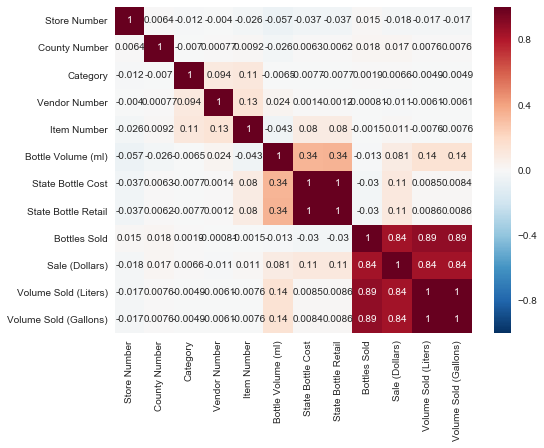

In [29]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 10
sns.heatmap(data.corr(), annot=True)

In [30]:
mean = Sales2015_to_2016["Sales 2016 Q1"].mean()
std_sales= Sales2015_to_2016["Sales 2016 Q1"].std()
SOE = std_sales/(len(Sales2015_to_2016)**0.5)
CI_95 = stats.norm.interval(0.95, loc = mean, scale = SOE)
print "95% Confidence Interval is CI:", CI_95 
beta_predictors(Sales2015_to_2016["Sales 2016 Q1"],Sales2015_to_2016["Total 2015 Sales"])

95% Confidence Interval is CI: (43125.34711183537, 56039.374600285875)
Pearson Correlation is nan


'Estimate for Y-Intercept(Beta0) is nan and the estimate for the Slope(Beta1) is nan.'

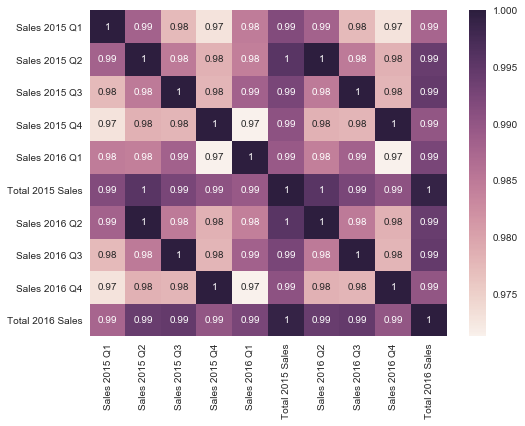

In [31]:
sns.heatmap(Sales2015_to_2016.corr(),annot=True)

## Orindary Least Squares and Linear Regression Model


In [32]:
X = Sales2015_to_20161["Sales 2016 Q1"]
y = Sales2015_to_20161["Total 2015 Sales"]
X = sm.add_constant(X) ## let us add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

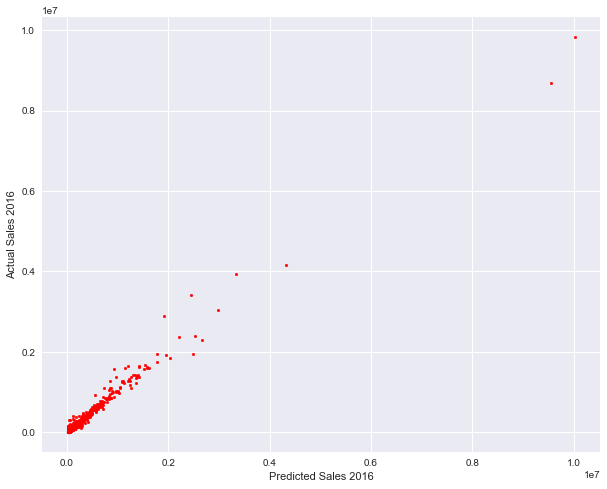

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(predictions, y, s=30, c='red', marker='.', zorder=10) #predictions, y values, 
plt.xlabel("Predicted Sales 2016")
plt.ylabel("Actual Sales 2016")
plt.savefig('Total Model Chart')
plt.show()

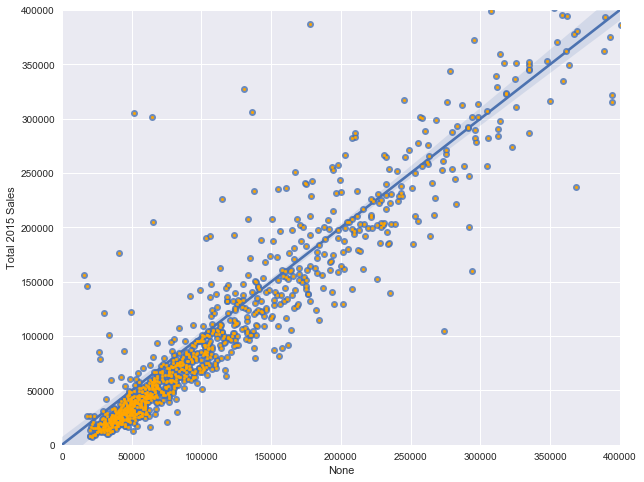

In [34]:
#Zoom in of Model Chart to show largest cluster
plt.figure(figsize=(10,8))
plt.scatter(predictions, y, s=30, c='orange', marker='.', zorder=10) #predictions, y values, 
plt.title("")
plt.xlabel("Predicted Sales 2016")
plt.ylabel("Actual Sales 2016")
plt.xlim(0, 400000)
plt.ylim(0, 400000)
sns.regplot(predictions, Sales2015_to_20161["Total 2015 Sales"], Sales2015_to_20161)
plt.savefig('Zoomed Model Chart')
plt.show()

In [35]:
Sales2015_to_20161["Sales 2015 Q1"].sort_values(axis = 0, ascending = False) 
#shows us largest outliers which are top two points on first chart and a few that have high sales but dont register on the chart

Store Number
2633    2336611.83
4829    2082399.57
3385    1079968.93
3420     976962.62
2512     926706.76
3952     759244.25
3354     555167.40
3773     509302.45
2670     501953.12
4167     480485.66
2625     447305.50
3814     445157.58
3447     445058.32
3494     434110.57
3524     406831.95
2629     381036.91
3820     374152.30
4312     363295.11
2648     361865.13
2616     358098.75
2106     337166.53
2593     332692.67
2666     327334.28
2544     327172.32
5102     321939.78
2508     321766.28
2191     318758.97
2619     313345.86
2561     312502.67
2501     310718.21
           ...    
4790       2972.18
4880       2940.00
4701       2761.23
4961       2745.83
4529       2719.42
4627       2597.88
4689       2558.28
4507       2514.60
4542       2417.52
4838       2415.78
4858       2412.02
4948       2215.44
5083       2063.34
4703       2009.04
4532       1910.64
4944       1897.03
4707       1882.44
5035       1593.50
4706       1555.08
5006       1536.82
5062       1463.11

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total 2015 Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 5.578e+04
Date:                Thu, 14 Sep 2017   Prob (F-statistic):               0.00
Time:                        10:53:47   Log-Likelihood:                -15219.
No. Observations:                1201   AIC:                         3.044e+04
Df Residuals:                    1199   BIC:                         3.045e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.477e+04   2404.441      6.143      0.000    1.01e+04    1.95e+04
Sales 2016 Q1     4.0943      0.017    236.168      0.000       4.060       4.128
==============================================================================
Omnibus:                     1148.093   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           221035.142
Skew:                           3.853   Prob(JB):                         0.00
Kurtosis:                      69.013   Cond. No.                     1.50e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# create training and testing vars

X_train, X_test, y_train, y_test = train_test_split(Sales2015_to_20161[[ "Sales 2016 Q1"]], y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(840, 1) (840,)
(361, 1) (361,)


In [38]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
print lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


Score: 0.975581500378


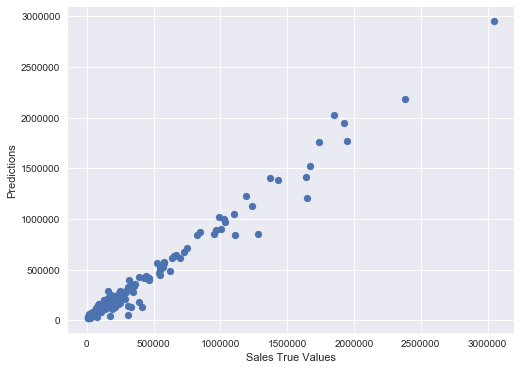

In [39]:
plt.scatter(y_test, predictions)
plt.xlabel("Sales True Values")
plt.ylabel("Predictions")
#Print test score
print "Score:", model.score(X_test, y_test)

In [40]:
#K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
#Performing 10-Fold Cross Validation
scores = cross_val_score(model, X_train, y_train, cv=10)
print "Cross-validated scores:", scores
print "Average: ", scores.mean()

Cross-validated scores: [ 0.88132036  0.98312846  0.98419945  0.97618011  0.96716789  0.99766366
  0.96289678  0.97527592  0.89096537  0.96503153]
Average:  0.958382952831


Cross-Predicted Accuracy: 0.9721862506


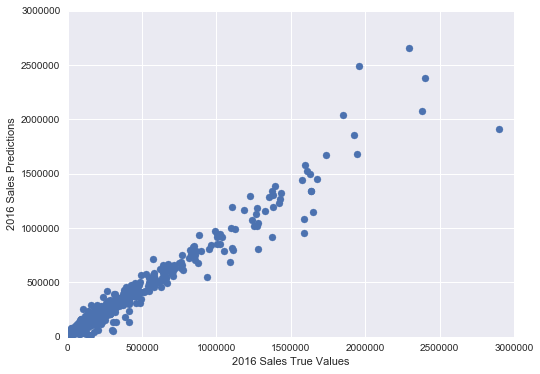

In [41]:
# Make cross validated predictions
predictions = cross_val_predict(model, Sales2015_to_20161[[ "Sales 2016 Q1"]], y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
plt.xlabel("2016 Sales True Values")
plt.ylabel("2016 Sales Predictions")
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)
plt.figure(figsize=(8,8))
print "Cross-Predicted Accuracy:", accuracy

In [42]:
#Ridge Regression
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #Calculates Root Mean Squared Error(RMSE)

58877.010285


In [43]:
#decreases RMSE
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

76703.2836152


In [44]:
# examine the coefficients
print ridgereg.coef_

[ 3.69076299]


In [45]:
# creates an array of alpha values
alpha_range = 10.**np.arange(-1, 2)
alpha_range

array([  0.1,   1. ,  10. ])

In [46]:
# selects the best alpha with RidgeCV(ridge cross-validate)
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.10000000000000001

In [47]:
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

76703.2836152
